<h1> Problem

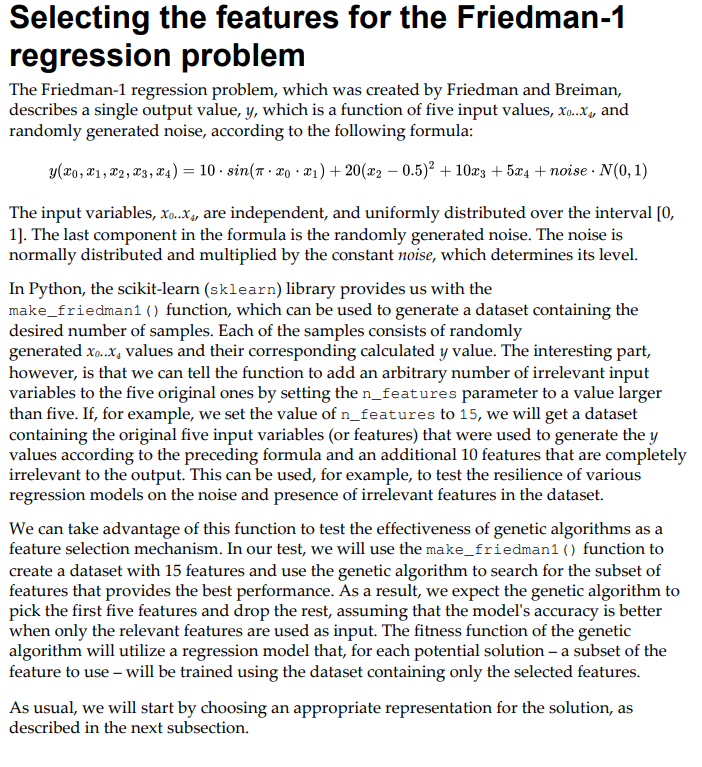

In [1]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 8.6 MB/s 


<h1> Dataset, Model, Fitness function

In [16]:
from sklearn import datasets, ensemble
import pandas as pd
import numpy as np
import random

# CONTROL PANEL
NUM_SAMPLES = 150
NUM_FEATURES = 15
NOISE = 1.0
RANDOM_SEED = 42
random.seed(RANDOM_SEED)


# TAKING DATA
def takeData(numSamples, numFeatures, Noise, randomSeed):
  from sklearn import datasets, model_selection
  import pandas as p
  import numpy as np

  # Taking dataset
  data_with_targets = datasets.make_friedman1(n_samples=NUM_SAMPLES,n_features=NUM_FEATURES, noise=NOISE, random_state=RANDOM_SEED)
  df = pd.DataFrame(data_with_targets[0], columns=[f"x{i}" for i in range(NUM_FEATURES)])
  target = pd.DataFrame(data_with_targets[1], columns=["Target"])
  X, y = data_with_targets[0], data_with_targets[1]

  # Separing the dataset
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=randomSeed)


  return X, y, X_train, X_test, y_train, y_test, df, target

# FITNESS FUNCTION
def fitness_function(individual, MODEL):
  from sklearn import metrics
  global X_train, X_test, y_train, y_test

  i = [i for i, n in enumerate(individual) if n == 0]
  X_train_current = np.delete(X_train,i,1)
  X_test_current = np.delete(X_test,i,1)


  MODEL.fit(X_train_current, y_train)
  y_pred = MODEL.predict(X_test_current)
  fitness = metrics.mean_squared_error(y_test, y_pred)
  return fitness,


# APPLYING
X, y, X_train, X_test, y_train, y_test, df, target = takeData(NUM_SAMPLES, NUM_FEATURES, NOISE, RANDOM_SEED)
MODEL = ensemble.GradientBoostingRegressor(random_state=RANDOM_SEED)

# TESTING
# For this problem, features selections, we will utilize the chromosome like a binary list
# [ 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0] where 0 means that the columns not was selected and 1 was selected
# Our fitness function will be the ( mean squared error ) the smaller is better is.
solution = [random.randint(0,1) for i in range(NUM_FEATURES)]
print(solution)
print(fitness_function(solution, MODEL))

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
(30.60829554893177,)


In [17]:
display(df)
display(target)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,0.020584,0.969910,0.832443,0.212339,0.181825
1,0.183405,0.304242,0.524756,0.431945,0.291229,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450
2,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,0.122038,0.495177,0.034389,0.909320,0.258780
3,0.662522,0.311711,0.520068,0.546710,0.184854,0.969585,0.775133,0.939499,0.894827,0.597900,0.921874,0.088493,0.195983,0.045227,0.325330
4,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,0.140924,0.802197,0.074551,0.986887,0.772245,0.198716,0.005522,0.815461,0.706857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.837041,0.279276,0.642882,0.694151,0.512655,0.305311,0.212644,0.033189,0.303946,0.653163,0.938305,0.871204,0.766065,0.788447,0.664985
146,0.260287,0.907195,0.670732,0.560441,0.110989,0.447056,0.460358,0.864564,0.546648,0.380401,0.976800,0.110721,0.422548,0.042025,0.739904
147,0.918077,0.280037,0.858342,0.292218,0.910770,0.753962,0.804907,0.018007,0.962810,0.726671,0.304751,0.829395,0.281521,0.872754,0.112580
148,0.703686,0.540698,0.096534,0.241894,0.012404,0.468768,0.301265,0.598357,0.297238,0.299919,0.743193,0.048143,0.902895,0.852264,0.667805


,Target
0,17.813459
1,8.032973
2,21.487763
3,13.442684
4,7.683398
...,...
145,16.620898
146,13.062320
147,17.161523
148,14.951612


<h1> Is really necessary the genetic features selection?

Primeiras 1 features(recursos): score = (28.20947642080174,)
Primeiras 2 features(recursos): score = (24.18144744429892,)
Primeiras 3 features(recursos): score = (15.672181689928635,)
Primeiras 4 features(recursos): score = (8.291571808678617,)
Primeiras 5 features(recursos): score = (6.356069550223101,)
Primeiras 6 features(recursos): score = (6.00325888411148,)
Primeiras 7 features(recursos): score = (6.574337359797388,)
Primeiras 8 features(recursos): score = (6.47419228353361,)
Primeiras 9 features(recursos): score = (7.023751967243461,)
Primeiras 10 features(recursos): score = (6.998981860492361,)
Primeiras 11 features(recursos): score = (7.561479245365432,)
Primeiras 12 features(recursos): score = (7.891669814863827,)
Primeiras 13 features(recursos): score = (7.440196695763697,)
Primeiras 14 features(recursos): score = (8.911650984870432,)
Primeiras 15 features(recursos): score = (8.931348768029295,)


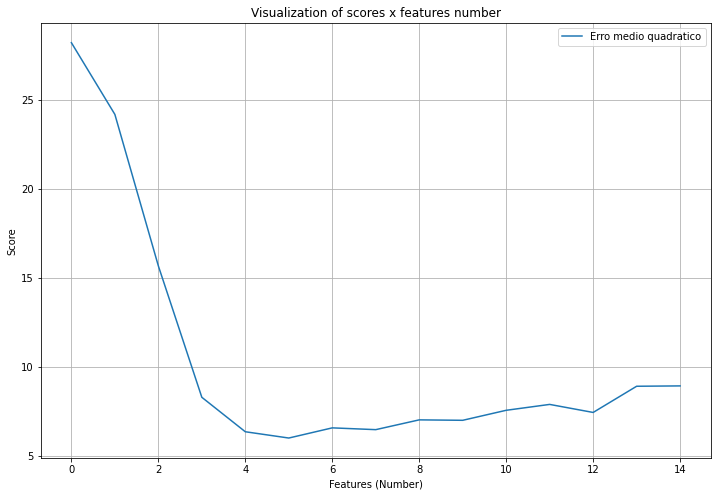

In [18]:
# Here we will teste how the model behaves changing the features number
import matplotlib.pyplot as plt

# CALCULATING
fitness = []
for i in range(NUM_FEATURES):
  solution = [1]*(i+1) + [0]*(15-(i+1))
  fitness.append(fitness_function(solution, MODEL))
  print(f"Primeiras {i+1} features(recursos): score = {fitness[i]}")


# PLOTTING
plt.figure(figsize=(12,8))
plt.plot([i for i in range(NUM_FEATURES)], fitness, label="Erro medio quadratico")


# ENHANCING
plt.xlabel(xlabel="Features (Number)")
plt.ylabel(ylabel="Score")
plt.title("Visualization of scores x features number")
plt.legend()

plt.grid(b=True)
plt.show()

In [ ]:
# We observed that the number of features is really important for our model, then we will select the best features for us

<h1>Solving the problem

In [5]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


# STRUCTURE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
CHROMOSOME_LENGTH = NUM_FEATURES # Dimensions of variables
def geneBin():
  return random.randint(0,1)
toolbox.register("Gene", geneBin)
toolbox.register("Chromosome", tools.initRepeat, creator.ChromosomeStruct, toolbox.Gene, n=CHROMOSOME_LENGTH)
toolbox.register("Individual", toolbox.Chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individual)


# GENETIC OPERATORS 
toolbox.register("evaluate", fitness_function, MODEL=MODEL)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=2/CHROMOSOME_LENGTH)

  
# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
hof = tools.HallOfFame(5)


# CONTROL PANEL
POPULATION_SIZE = 100
PROBABILITY_CROSSOVER = 0.8
PROBABILITY_MUTATION = 0.2
MAX_GENERATIONS = 20 # (stopping condition)
#random.seed(42)


# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, logbook = algorithms.eaSimple(population,
                                      toolbox,
                                      cxpb=PROBABILITY_CROSSOVER,
                                      mutpb=PROBABILITY_MUTATION,
                                      ngen=MAX_GENERATIONS,
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)

gen	nevals	max    	min    	mean   
0  	100   	54.7563	7.50075	23.7083
1  	79    	35.481 	7.08716	15.8929
2  	91    	26.6305	7.15307	12.301 
3  	89    	19.5093	6.70632	9.64168
4  	88    	25.1007	6.47608	8.75972
5  	87    	16.3272	6.3605 	7.66966
6  	84    	26.4362	6.3605 	7.81532
7  	85    	29.1329	6.19479	7.71006
8  	71    	20.918 	6.19479	7.56068
9  	88    	27.4237	6.19479	7.46098
10 	83    	21.6124	6.18712	7.08595
11 	79    	27.6651	6.18712	7.23306
12 	84    	34.5756	6.08138	7.95684
13 	88    	29.5601	6.08138	7.92407
14 	95    	16.9954	6.08138	7.06504
15 	80    	22.8691	6.08138	7.23508
16 	84    	19.5447	6.08138	7.45322
17 	84    	34.929 	6.08138	7.63707
18 	78    	18.1052	6.08138	6.63963
19 	92    	17.8608	6.08138	6.80443
20 	88    	34.9536	6.00326	7.33504


<h1> Visualization of results

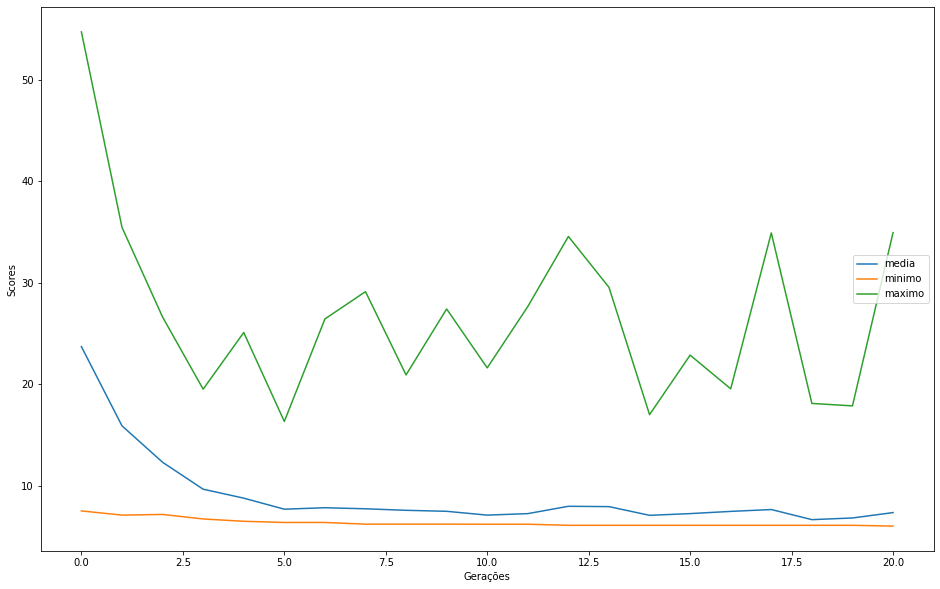

In [6]:
import matplotlib.pyplot as plt

# taking data
y_min = logbook.select("min")
y_max = logbook.select("max")
y_mean = logbook.select("mean")
x_gen = logbook.select("gen")


#plotting
plt.figure(figsize=(16,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
plt.plot(x_gen, y_max, label="maximo")


plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)
plt.show()

In [7]:
hof[0]

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

<h1> Solving the problem: Elitims

In [8]:
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

In [9]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


# STRUCTURE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
CHROMOSOME_LENGTH = NUM_FEATURES # Dimensions of variables
def geneBin():
  return random.randint(0,1)
toolbox.register("Gene", geneBin)
toolbox.register("Chromosome", tools.initRepeat, creator.ChromosomeStruct, toolbox.Gene, n=CHROMOSOME_LENGTH)
toolbox.register("Individual", toolbox.Chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individual)


# GENETIC OPERATORS 
toolbox.register("evaluate", fitness_function, MODEL=MODEL)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=2/CHROMOSOME_LENGTH)

  
# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
hof = tools.HallOfFame(5)


# CONTROL PANEL
POPULATION_SIZE = 100
PROBABILITY_CROSSOVER = 0.8
PROBABILITY_MUTATION = 0.2
MAX_GENERATIONS = 20 # (stopping condition)
#random.seed(42)


# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, logbook = eaSimpleWithElitism(population,
                                      toolbox,
                                      cxpb=PROBABILITY_CROSSOVER,
                                      mutpb=PROBABILITY_MUTATION,
                                      ngen=MAX_GENERATIONS,
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ChromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max    	min    	mean   
0  	100   	50.4852	7.82504	23.8464
1  	75    	34.101 	7.63379	16.2282
2  	77    	33.6824	6.97937	12.1147
3  	81    	28.7726	6.31041	9.37753
4  	81    	29.9645	6.31041	9.16617
5  	79    	14.3018	6.20168	7.66283
6  	81    	23.1885	6.20168	7.52696
7  	84    	21.4125	6.20168	7.38804
8  	71    	23.2826	6.18712	6.93742
9  	85    	18.3463	6.18712	6.89298
10 	80    	17.3689	6.18712	7.04056
11 	77    	18.4798	6.18712	7.06376
12 	88    	21.6464	6.18712	7.2122 
13 	80    	18.1091	6.18712	7.11677
14 	93    	20.1604	6.18712	6.79097
15 	78    	15.9789	6.18712	6.54477
16 	82    	19.5457	6.18712	7.08752
17 	80    	26.5783	6.18712	7.47437
18 	76    	22.996 	6.18712	7.04498
19 	76    	16.5356	6.08138	6.8779 
20 	83    	17.7731	6.08138	6.55442


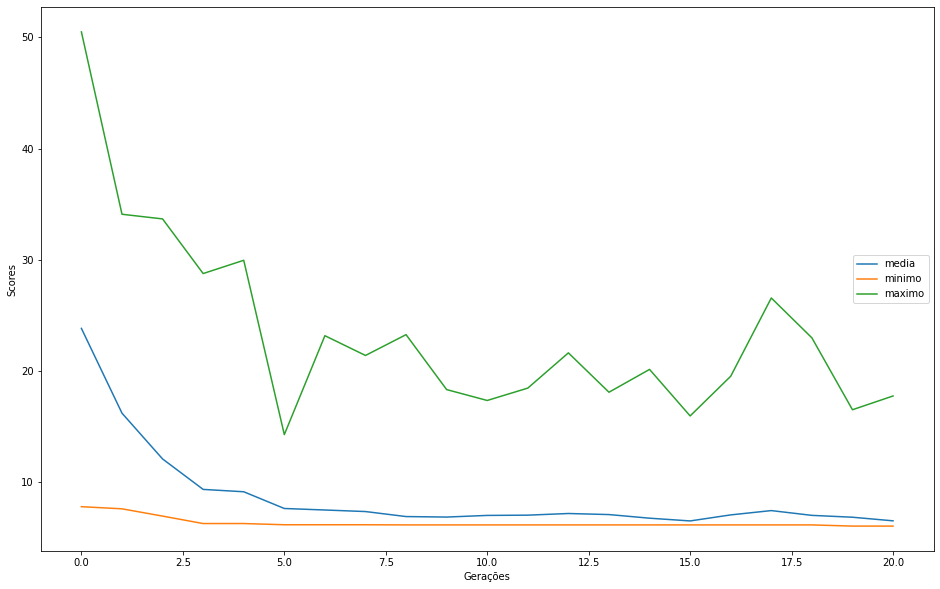

In [10]:
import matplotlib.pyplot as plt

# taking data
y_min = logbook.select("min")
y_max = logbook.select("max")
y_mean = logbook.select("mean")
x_gen = logbook.select("gen")


#plotting
plt.figure(figsize=(16,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
plt.plot(x_gen, y_max, label="maximo")


plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)
plt.show()

In [11]:
hof[0]

[1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]